<a href="https://colab.research.google.com/github/andhika7/testing_ML/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__) #versi tensor

2.14.0


## REGRESI

In [ ]:
import pandas as pd # lib untuk membaca data berbentuk tabular
import numpy as np # lib untuk bekerja dengan array
import matplotlib.pyplot as plt # lib untuk visualisasi data
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv') # df = data frame
df.head() # menampilkan data awalnya

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.describe() # mendiskripsikan data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

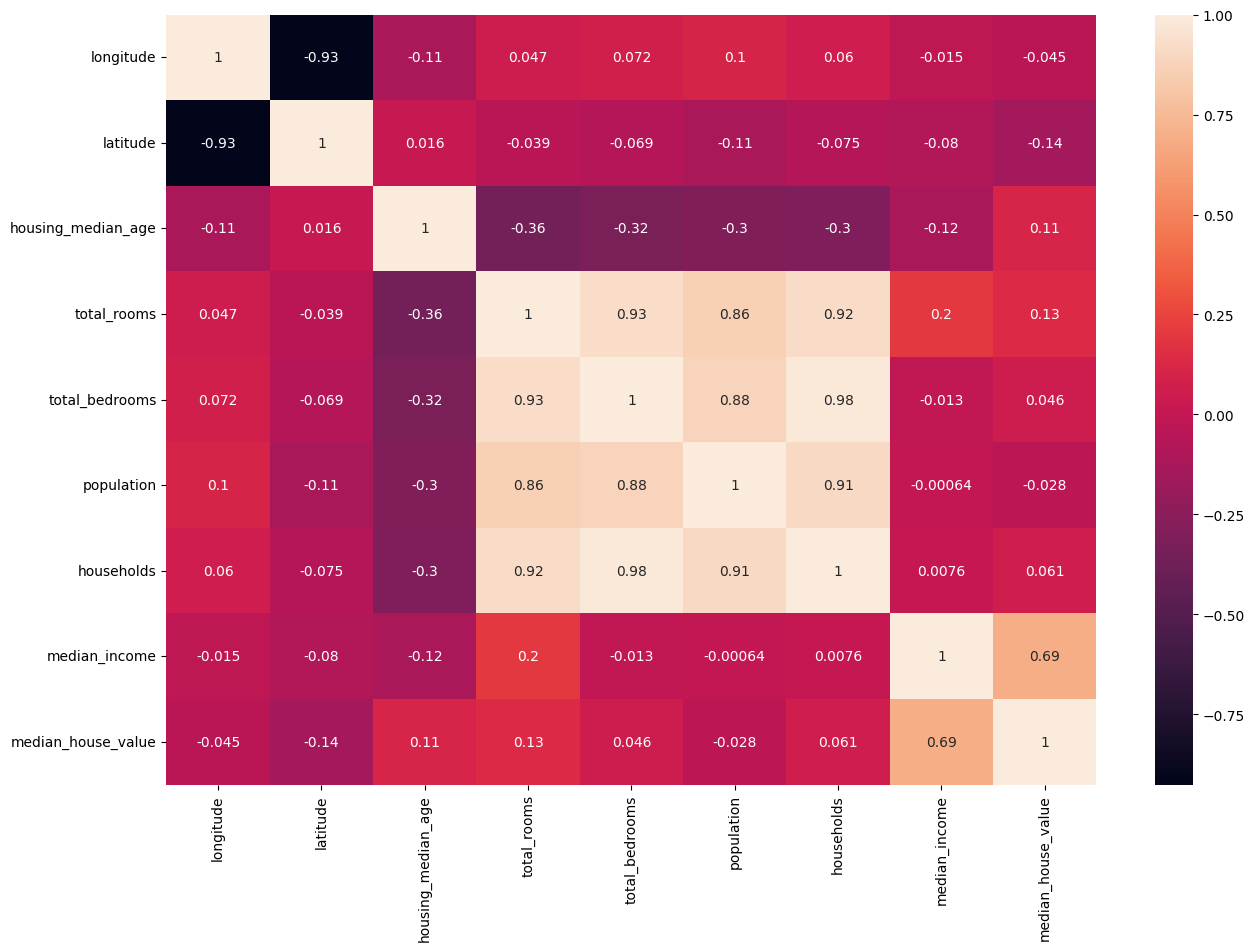

In [ ]:
# mengambil fitur yang penting dengan cara nilai korelasi (pengaruh kalo satu dengan yang lain)
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True) # memunculkan nilai2

 korelasi antara median_house_value dengan longitude sebesar -0.045 (range 0-1)
 +- adalah sifat jika sama2 + brarti searah

In [ ]:
# regresi itu supervised learning
# memisahkan antara feature dan label
x = df.drop('median_house_value', axis=1) # mengambil semua nilai kecuali median_house_value
y = df[['median_house_value']] # hanya mengambil median_house_value

print(x.shape)
print(y.shape)

(17000, 8)
(17000, 1)


In [ ]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [ ]:
# membuat model deep learning ada 3 tipe data :
# - data training
# - data validasi (untuk deep learning)
# - data testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) # ukuran data testing 20% dari seluruh data

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(13600, 8) (13600, 1)
(3400, 8) (3400, 1)


In [ ]:
x.shape

(17000, 8)

In [ ]:
# membuat model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() # model nama variabel
model.add(Dense(x.shape[1], activation='relu')) # input layer (array ke 1=8)
model.add(Dense(200, activation='relu')) # hidden layer 1, 200 neuron
model.add(Dense(200, activation='relu')) # hidden layer 2
model.add(Dense(1)) # output 1 neuron

model.compile(optimizer='adam', loss='mae') # gabung menjadi 1, optimizer adam yg umum digunakan, loss menyesuaikan denga masalah terkait

In [ ]:
history = model.fit(x_train, y_train,  # variabel history digunakan menyimpan hasil pembelajaran
                    validation_split=0.2, # validasi 20% dari data training
                    epochs=100) # belajar sebanyak 100 kali

Epoch 1/100
340/340 [==============================] - 7s 14ms/step - loss: 131237.4062 - val_loss: 113733.8594
Epoch 2/100
340/340 [==============================] - 4s 11ms/step - loss: 109249.5078 - val_loss: 105039.9609
Epoch 3/100
340/340 [==============================] - 4s 11ms/step - loss: 96289.9844 - val_loss: 91158.8203
Epoch 4/100
340/340 [==============================] - 1s 4ms/step - loss: 86085.0625 - val_loss: 87141.1328
Epoch 5/100
340/340 [==============================] - 1s 4ms/step - loss: 83534.1719 - val_loss: 87051.9141
Epoch 6/100
340/340 [==============================] - 6s 17ms/step - loss: 82656.1016 - val_loss: 84834.5156
Epoch 7/100
340/340 [==============================] - 3s 8ms/step - loss: 81647.9922 - val_loss: 84469.0156
Epoch 8/100
340/340 [==============================] - 4s 11ms/step - loss: 80821.5234 - val_loss: 83392.6719
Epoch 9/100
340/340 [==============================] - 4s 12ms/step - loss: 80414.4844 - val_loss: 82585.7578
Epoch 10/

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (32, 8)                   72        
                                                                 
 dense_5 (Dense)             (32, 200)                 1800      
                                                                 
 dense_6 (Dense)             (32, 200)                 40200     
                                                                 
 dense_7 (Dense)             (32, 1)                   201       
                                                                 
Total params: 42273 (165.13 KB)
Trainable params: 42273 (165.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


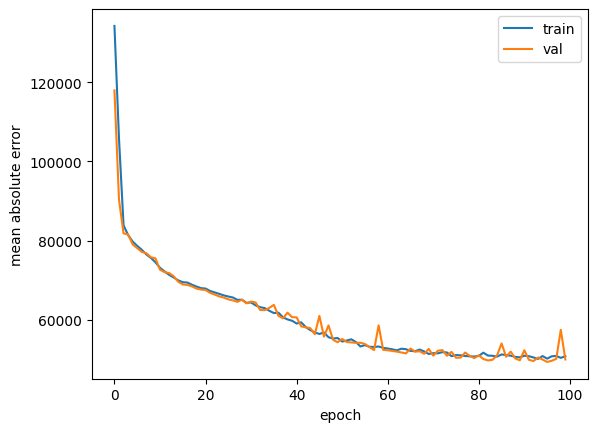

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mean absolute error')
plt.show()

In [ ]:
# mengecek performa
# melakukan prediksi
y_pred = model.predict(x_test)

107/107 [==============================] - 0s 2ms/step


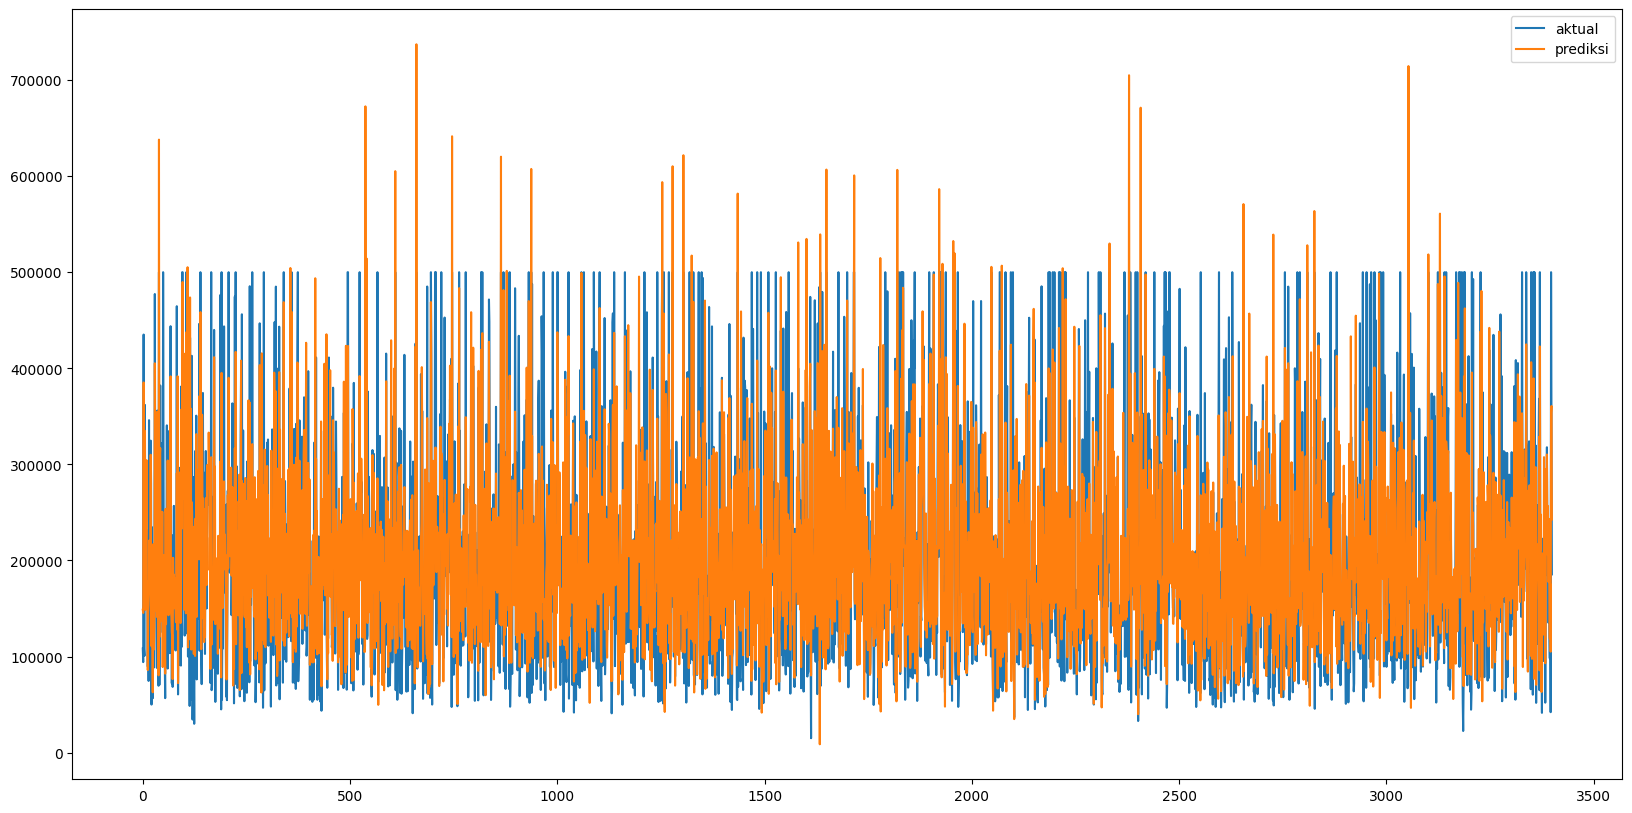

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_test.values, label='aktual')
plt.plot(y_pred, label='prediksi')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test.values, y_pred)
rmse = mean_squared_error(y_test.values, y_pred, squared=False) #RMSE
mae = mean_absolute_error(y_test.values, y_pred)
mape = mean_absolute_percentage_error(y_test.values, y_pred)
nilai_r = r2_score(y_test.values, y_pred)

print('nilai mean squared error                   = {:.2f}'.format(mse))
print('nilai root mean squared error              = {:.2f}'.format(rmse))
print('nilai mean absolute error                  = {:.2f}'.format(mae))
print('nilai mean absoluter percentage error      = {:.2f}'.format(mape))
print('nilai r2                                   = {:.2f}'.format(nilai_r))

nilai mean squared error                   = 4800833129.40
nilai root mean squared error              = 69288.04
nilai mean absolute error                  = 50006.71
nilai mean absoluter percentage error      = 0.30
nilai r2                                   = 0.65


## KLASIFIKASI

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape", x_train.shape) # 28, 28 itu ukuran gambar 28x28 pixel
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


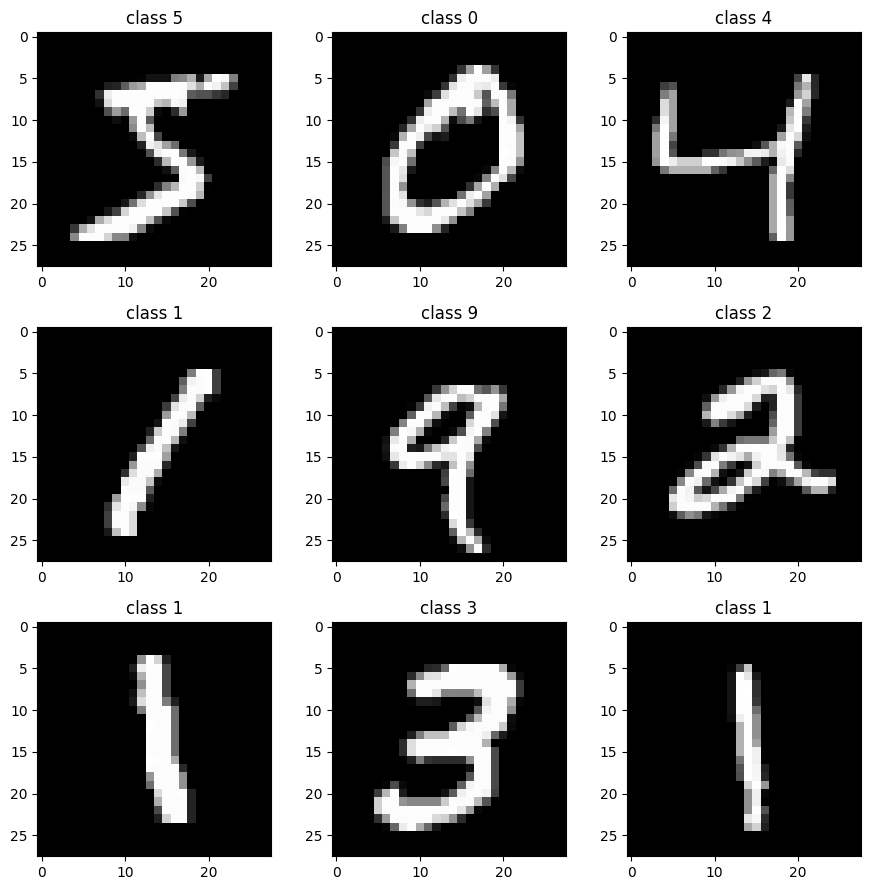

In [ ]:
# ploting data gambar
plt.rcParams['figure.figsize']=(9,9) # membuat gambar lebih besar

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("class {}".format(y_train[i]))

plt.tight_layout()


In [ ]:
y_train[:9] # data label itu nama angkanya sendiri

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [ ]:
# cetak data
def matprint(mat, fmt="g"):
  col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
  for x in mat:
    for i, y in enumerate(x):
        print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end=" ")
    print("")

matprint(x_train[4])

0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 
0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 
0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 
0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 
0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 
0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 
0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 
0 0 0 0 0 0  0   0   0   0   0   0  55 148 210 253 253 113  87 148  55 0 0 0 0 0 0 0 
0 0 0 0 0 0  0   0   0   0   0  87 232 252 253 189 210 252 252 253 168 0 0 0 0 0 0 0 
0 0 0 0 0 0  0   0   0   4  57 242 252 190  65   5  12 182 252 253 116 0 0 0 0 0 0 0 
0 0 0 0 0 0  0   0   0  96 252 252 183  14   0   0  92 252 252 225  21 0 0 0 0 0 0 0 
0 0 0 0 0 0  0   0 132 253 252 146  14   0   0   0 215

In [ ]:
28*28

784

In [ ]:
# data tidak bisa 2 dimensi (28x28) hrs diubah menjadi 1 dimensi
x_train = x_train.reshape(60000, 784) # reshape 60k data 28x28 menjadi 60k 784-panjang vector
x_test = x_test.reshape(10000, 784) # reshape 60k data 28x28 menjadi 60k 784-panjang vector

x_train = x_train.astype('float32') # change integer to 32-bit float
x_test = x_test.astype('float32') # change integer to 32-bit float

x_train /= 255 # normalisasi tiap nilai untuk setiap pixel (nilai menjadi antara 0-1)
x_test /= 255

print("training matrix shape", x_train.shape)

training matrix shape (60000, 28, 28, 1)
training matrix shape (10000, 28, 28, 1)


#### klasifikasi dalam bentuk persentase setiap kelas yang ada

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
!pip install np_utils

In [ ]:
y_train[:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras.utils import to_categorical

nb_classes = 10 # number dari digit

y_train = keras.utils.to_categorical(y_train, nb_classes)

In [ ]:
y_train[4]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# Membuat modelnya

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='sigmoid')) # input layer + hidden1 neuron
model.add(Dropout(0.2)) # dropout, input shape terhubung ke hidden layer dpt weight bias, buang 20% supaya lbh baik
model.add(Dense(256, activation='relu')) # hidden 2
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu')) # hidden 3
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax')) # output layer 10 kelas


In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 256)               200960    
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
                                                                 
 dense_46 (Dense)            (None, 256)               65792     
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_47 (Dense)            (None, 256)               65792     
                                                                 
 dropout_29 (Dropout)        (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 10)              

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
keras.__version__

'2.14.0'

In [ ]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5


ValueError: ignored